# Regresion Lineal Multiple (RLM)
## Tarea 2
### Gabriel Briones Sayeg A01222517

En este ejercicio usaremos la base de datos de Boston_housing_dataset (https://www.kaggle.com/apratim87/housingdata) la cual consta de 13 variable independientes y la variable dependiente. Son 506 datos de casas cuyo objetivo es la predicción de su costo (MEDV). 

Obtener el modelo de Regresión Lineal Múltiple (RLM) del modelo y con base a dicho modelo contestar los siguientes incisos:

In [1]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv('housingdata.csv', header=None, names=column_names)

In [3]:
x = data.iloc[:,:13]
y = data.iloc[:,13]

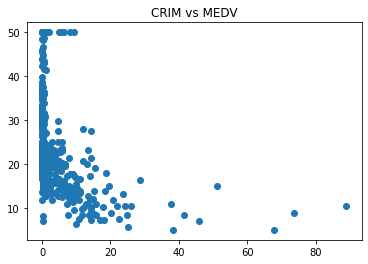

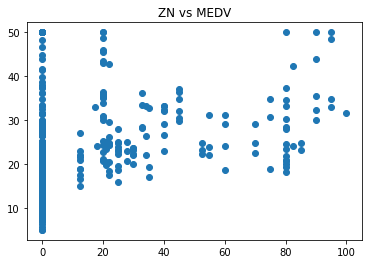

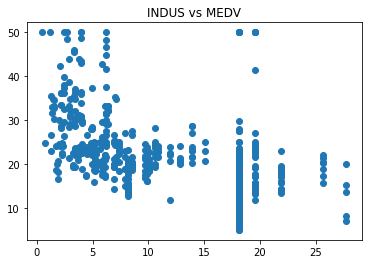

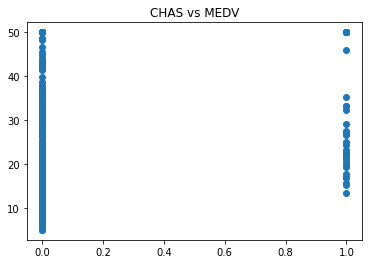

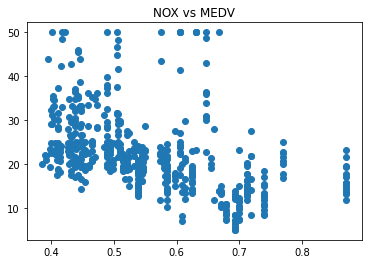

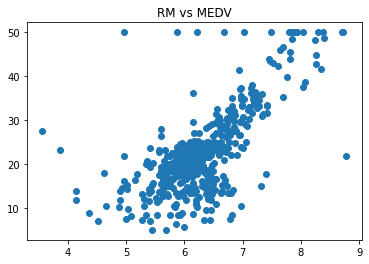

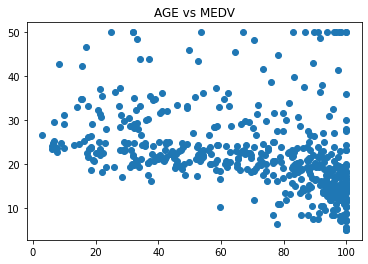

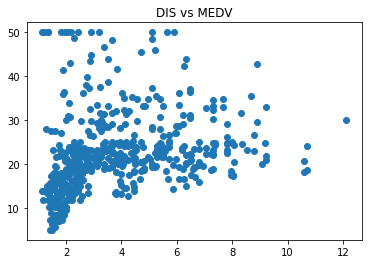

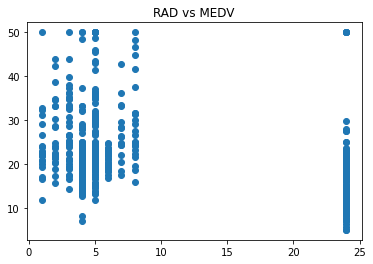

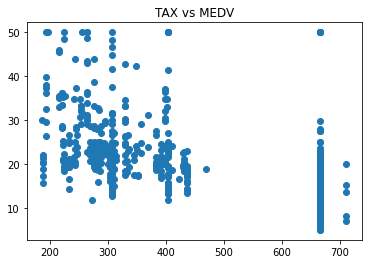

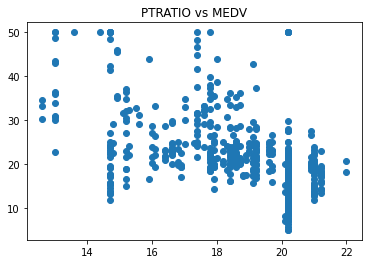

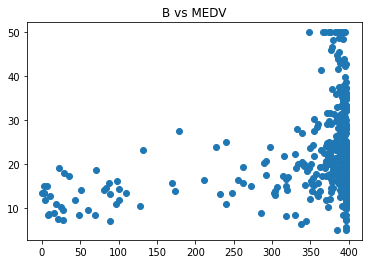

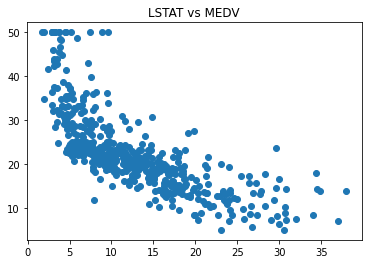

In [4]:
for col in column_names[:-1]:
    plt.scatter(x.loc[:,[col]],y)
    plt.title(f"{col} vs MEDV")
    plt.show()

In [5]:
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        12:26:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretar el valor del coeficiente de determinación ajustado 𝑅^2.

El coeficiente de determinacion R^2 nos sirve para representar el grado de variabilidad entre las variables independientes y la dependiente, donde un valor más cercano a 1 significa que las variables representan el modelo de una manera más precisa. Sin embargo, 

### Determina qué variables no resultaron significativas considerendo un 𝑣𝑎𝑙𝑜𝑟-𝑝 = 0.01. 

Las variables que tienen un p-value > 0.01 son "INDUS" con p-value = 0.738 y "AGE" con p-value = 0.958

### Obtener un segundo modelo de RLM omitiendo las variables que no resultaron significativas en el inciso anterior. Comparar su coeficiente de determinación ajustado con base con respecto al primer modelo. 

In [7]:
new_x = x_with_const.drop(columns=["INDUS", "AGE"])

In [8]:
model = sm.OLS(y, new_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          5.54e-137
Time:                        12:26:24   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El coeficiente de determinacion con respecto al modelo anterior aumento en 0.001, por lo que no representa una mejora considerable.

### Obtener la matriz de correlación de Pearson de las 14 variables. Con base a dicha matriz identifica los pares de variables independientes que tengan un coeficiente de correlación mayor o igual a 0.7 en valor absoluto. Obtener un tercer modelo de RLM y compara la significacia de los coeficientes y su coeficiente de determinación ajustado con respecto a los dos primeros modelos. 

In [9]:
data.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Variables independientes con |correlacion| >= 0.7 entre ellas:

 * INDUS y NOX = 0.76
 * INDUS y DIS = -0.71
 * INDUS y TAX = 0.72
 * NOX y AGE = 0.73
 * NOX y DIS = -0.77
 * AGE y DIS = -0.75
 * RAD y TAX = 0.91

In [10]:
new_x = x_with_const.drop(columns=["NOX", "AGE", "DIS", "RAD", "TAX"])
model = sm.OLS(y, new_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.21e-123
Time:                        12:26:24   Log-Likelihood:                -1538.1
No. Observations:                 506   AIC:                             3094.
Df Residuals:                     497   BIC:                             3132.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6207      4.270      2.721      0.007       3.231      20.010
CRIM          -0.0381      0.031     -1.209      0.227      -0.100       0.024
ZN            -0.0031      0.012     -0.259      0.796      -0.027       0.020
INDUS          0.0163      0.047      0.345      0.730      -0.076       0.109
CHAS           3.2190      0.916      3.514      0.000       1.419       5.019
RM             4.7045      0.423     11.133      0.000       3.874       5.535
PTRATIO       -0.8561      0.122     -6.992      0.000      -1.097      -0.616
B              0.0095      0.003      3.355      0.001       0.004       0.015
LSTAT         -0.5110      0.050    -10.284      0.000      -0.609      -0.413
==============================================================================
Omnibus:                      212.224   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1173.006
Skew:                           1.765   Prob(JB):                    1.93e-255
Kurtosis:                       9.570   Cond. No.                     6.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El coeficiente de determinacion con respecto a los 2 modelos anteriores disminuyo, con respecto al modelo de mayor coeficiente de determinacion, tiene una diferencia de 0.043, por lo que tampoco podemos considerarlo como un cambio significativo.

### Con base a la matriz de correlación con las 14 variables, identifica ahora aquellas variables independientes que tengan una correlación de pearson mayor o igual a 0.5 con respecto a la variable dependiente MEDV. Obtener un cuarto modelo RLM y compararlo con los tres anteriores. 

Variables independientes con |correlacion| >= 0.5

 * RM = 0.69
 * PTRATIO = -0.51
 * LSTAT = -0.73

In [11]:
x_high_corr = x_with_const[['const', 'RM', 'PTRATIO', 'LSTAT']]
model = sm.OLS(y, x_high_corr).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          2.69e-123
Time:                        12:26:24   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.000      10.879      26.255
RM             4.5154      0.426     10.603      0.000       3.679       5.352
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En comparacion con los modelos anteriores, el coeficiente de determinacion es aun menor en este modelo, con una diferencia de 0.058 en comparacion con el modelo de mayor coeficiente.

### Usando únicamente la matriz 𝑋 con las 3 variables independientes del inciso anterior y la variable de salida MDEV, obtener la matriz pseudoinversa de Penrose 𝑋+. Posteriormente obtener los coeficientes 𝛽 del modelo RLM resultante mediante la expresión: 𝛽 =X+ 𝑌. Compáralo con el inciso anterior y escribe tus conclusiones. 

In [12]:
x_inv = pd.DataFrame(np.linalg.pinv(x_high_corr.values), x_high_corr.columns, x_high_corr.index)
x_inv.dot(y)

const      18.567112
RM          4.515421
PTRATIO    -0.930723
LSTAT      -0.571806
dtype: float64

Los coeficientes obtenidos mediante la pseudoinversa de Penrose son identicos a los calculados por el modelo de regresion lineal OLS de sklearn.

### Finalmente escribe tus concluiones de los resultados obtenidos. 

A pesar de que hay variables que parecen no ser significativas para usarlas en nuestros modelos de regresion lineal, cuando se toman todas ellas parece tener un coeficiente de determinacion suficientemente alto para ser consideradas, sin embargo, dado que la variable INDUS tiene un p-value grande, podemos eliminarla, dado que solamente estara metiendo ruido a nuestro modelo.